# **Lab 2 : False Position and Newton-Raphson method**<br>

The False Position method is one of the methods of finding roots of a non-linear function. Similar to the Bisection method, it falls under the category of **Bracketing methods** since the initial boundary guesses, x<sub>l</sub> and x<sub>u</sub>, must bracket the actual root. And the assumption here is that the function is real continuous, otherwise the False position method wouldn't work. The main difference between the Bisection method and False position method is that it takes advantage of the fact that one of the boundary values, either x<sub>l</sub> or x<sub>u</sub>, would be closer to the root of the function than the mid-point x<sub>m</sub>.

In today's lab, we will be implementing the False position method in python. Just like in the previous lab for Bisection method, we will be considering the function f(x) as an array of coefficients, for instance if we want to have f(x) = x<sup>3</sup>+x-2, then in python we will create an array as follows:


In [ ]:
f = [1,0,1,-2]

Note that your implementation should be able to handle the array f of any size,which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array f given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array f and a point x as input and evaluate the value of the function at that point x using a loop and return that value. This function will be called in the other function that you will implement, which is as follows:
```
falseposition(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array f and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most epsilon (%).

##Task 1
Implement the function for False position method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly. For the function given above, there is only one real root and it is 1.

In [ ]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    degree=len(f)
    val=0
    for i in range(degree):
        val += (f[i]*(pow(x,(degree-(i+1)))))
    return val

  

#Complete the following function
MAX_ITERS=10000
xrList = []
itersList1 = []
errorList1 = []
def falseposition(f, xl, xu, epsilon):
    #write your implementation here
    iters=0
    xr2=xl
    while iters<=MAX_ITERS:
        iters+=1
        if iters>1: itersList1.append(iters)
        fxl=func(f,xl)
        fxu=func(f,xu)
        xr=((fxl*xu)-(fxu*xl))/(fxl-fxu)
        if iters>1: xrList.append(xr)
        fxr=func(f,xr)
        error=abs((xr-xr2)/xr)
        if iters>1:
            errorList1.append(error*100)
        if fxl*fxr==0 or error<=epsilon:
            return xr
        elif fxl*fxr<0:
            xu=xr
        else:
            xl=xr
        xr2=xr


#Write a driver code here for calling the function and testing it
print(f'Root: {falseposition(f, -2, 2, 0.0002)}')


Root: 0.9998009749940354


In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the matplotlib library.

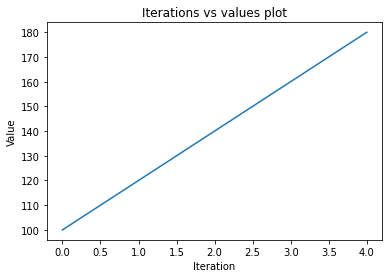

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] [0.6577181208053692, 0.81446870431805, 0.9029519296584194, 0.9503001287333893, 0.9748414024471593, 0.9873415881838427, 0.9936507650719328, 0.9968203434634182, 0.9984089079563476, 0.9992041375315376, 0.9996019895911415, 0.9998009749940354]


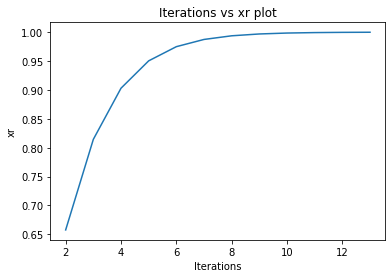

In [ ]:
plt.plot(itersList1, xrList)
print(itersList1,xrList)
plt.title("Iterations vs xr plot")
plt.xlabel("Iterations")
plt.ylabel("xr")
plt.show()

## Task 2
Generate a plot of **iteration vs relative approx error (%)** for the False Position method function you implemented earlier.

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] [39.183673469387756, 19.24574666670921, 9.799328450833707, 4.982446875817864, 2.5174632152639065, 1.266044688715755, 0.6349491300027779, 0.3179688709474727, 0.15910960732322404, 0.07958629726599387, 0.039801047191462144, 0.01990250138484381]


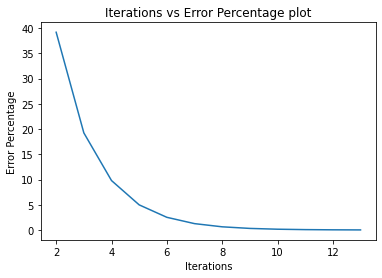

In [ ]:
# Write your code for generating the graph here
plt.plot(itersList1, errorList1)
print(itersList1,errorList1)
plt.title("Iterations vs Error Percentage plot")
plt.xlabel("Iterations")
plt.ylabel("Error Percentage")
plt.show()




# **Newton-Raphson method**
The Newton-Raphson method is another method of finding roots of a nonlinear function. Unlike the Bisection and False position method, it falls under the category of **Open methods** due to the fact that we only need one initial guess that does not have to bracket the actual root.

## Task 3
Implement the Newton-Raphson method for the above function and write a script for testing its implementation. The actual root is 1, and you can take the initial guess as 2.

In [ ]:
Xi = 2
epsilon = 0.01

# Write a function for evaluating the derivative of the polynomial given by array f
def derivative(f, x):
    degree=len(f)
    val=0
    for i in range(degree):
        val += ((degree-(i+1))*f[i]*(pow(x,(degree-(i+1)-1))))
    return val

# Complete the following function
def newtonraphson(f, Xi, epsilon):
    # write your implementation here
    iters = 0
    dfx=derivative(f,Xi)
    fx=func(f,Xi)
    x_next=Xi-(fx/dfx)
    error=abs((x_next-Xi)/x_next)
    iters+=1
    Xi=x_next
    while error>epsilon and iters<=MAX_ITERS:
        #iters+=1
        dfx=derivative(f,Xi)
        fx=func(f,Xi)
        x_next=Xi-(fx/dfx)
        iters+=1
        # if x_next <= 0.00001:
        #   break
        error=abs((x_next-Xi)/x_next)
        Xi=x_next
    
    return x_next

# Write a script here for calling the above function
a=-2
b=2
init_guess=random.uniform(a, b)
print(newtonraphson(f, init_guess, 0.0002))

1.0000000000686369
